<img src="baner_01.jpg">
<center>

# **Анализ и обработка на данни с Python**


    
## **УниБИТ**

</center>
Лекциите са базирани на отвореният курс за машинно обучение [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course с автор : [Yury Kashnitskiy](https://yorko.github.io). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Тема 1. Анализ на първични данни с Pandas</center>
## <center>Част 0. Работа с вектори в библиотеката NumPy

**Numpy** е библиотека на Python за изчислително ефективни операции с многоизмерни масиви, предназначена предимно за научни изчисления.

In [1]:
# Python 2 and 3 compatibility
from __future__ import absolute_import, division, print_function, unicode_literals

# деактивирайте предупрежденията на Anaconda
import warnings

warnings.simplefilter("ignore")
import numpy as np

In [65]:
if 'google.colab' in str(get_ipython()):
  path_data = "/content/drive/MyDrive/Colab Notebooks/ColabNotebooks/"
  print('Running on CoLab')
else:
  print('Not running on CoLab')
  path_data = "../data/"

Not running on CoLab


In [2]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

Такъв масив може да съдържа:
- стойности на физическите величини в различни моменти от време на моделиране
- стойности на сигнала, измерени от устройството
- интензитет на пикселите
- 3D координати на обекти, получени например от ЯМР
- ...

**Защо NumPy:** Ефективност на основните операции


In [3]:
L = range(1000)

In [4]:
%timeit [i**2 for i in L]

51.8 µs ± 2.5 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [5]:
a = np.arange(1000)

In [6]:
%timeit a**2

1.14 µs ± 16.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Онлайн помощ


In [7]:
?np.array

Docstring:
array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
      like=None)

Create an array.

Parameters
----------
object : array_like
    An array, any object exposing the array interface, an object whose
    ``__array__`` method returns an array, or any (nested) sequence.
    If object is a scalar, a 0-dimensional array containing object is
    returned.
dtype : data-type, optional
    The desired data-type for the array. If not given, NumPy will try to use
    a default ``dtype`` that can represent the values (by applying promotion
    rules when necessary.)
copy : bool, optional
    If true (default), then the object is copied.  Otherwise, a copy will
    only be made if ``__array__`` returns a copy, if obj is a nested
    sequence, or if a copy is needed to satisfy any of the other
    requirements (``dtype``, ``order``, etc.).
order : {'K', 'A', 'C', 'F'}, optional
    Specify the memory layout of the array. If object is not an array, the
    newly crea

търсене в документацията


In [8]:
np.lookfor("create array")

Search results for 'create array'
---------------------------------
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.char.array
    Create a `chararray`.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.from_dlpack
    Create a NumPy array from an object implementing the ``__dlpack__``
numpy.rec.fromarrays
    Create a record array from a (flat) list of arrays
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or POINTER.
numpy.ma.diagflat
    diagflat
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.rec.fromfile
    Create an array from binary file data
numpy.rec.fromstring
    Create a record array from binary data
numpy.lib.Arrayterator
    Buffered iterator for big arrays.
numpy.rec.fromrecords
    Create a recarray from a lis

In [9]:
np.con*?

np.concatenate
np.conj
np.conjugate
np.convolve

#### Библиотеката се импортира така

In [10]:
import numpy as np

## Създаване на масиви

* **1-D**:


In [11]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [12]:
a.ndim

1

In [13]:
a.shape

(4,)

In [14]:
len(a)

4

* **2-D, 3-D, ...**:


In [15]:
b = np.array([[0, 1, 2], [3, 4, 5]])  # 2 x 3 array
b

array([[0, 1, 2],
       [3, 4, 5]])

In [16]:
b.ndim

2

In [17]:
b.shape

(2, 3)

In [18]:
len(b)  # връща размера на първото измерение

2

In [19]:
c = np.array([[[1], [2]], [[3], [4]]])
c

array([[[1],
        [2]],

       [[3],
        [4]]])

In [20]:
c.shape

(2, 2, 1)

## Методи за създаване на масиви

На практика рядко добавяме елементи един по един

- Равномерно разпределени елементи:

In [21]:
a = np.arange(10)  # 0 .. n-1  (!)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
b = np.arange(1, 9, 2)  # start, end (exclusive), step
b

array([1, 3, 5, 7])

- по брой елементи:


In [23]:
c = np.linspace(0, 1, 6)  # start, end, num-points
c

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [24]:
d = np.linspace(0, 1, 5, endpoint=False)
d

array([0. , 0.2, 0.4, 0.6, 0.8])

- Често срещани масиви:


In [25]:
a = np.ones((3, 3))  # reminder: (3, 3) is a tuple
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [26]:
b = np.zeros((2, 2))
b

array([[0., 0.],
       [0., 0.]])

In [27]:
c = np.eye(3)
c

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [28]:
d = np.diag(np.array([1, 2, 3, 4]))
d

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

* `np.random` генерация на случайни числа (Mersenne Twister PRNG):

In [29]:
a = np.random.rand(4)  # uniform in [0, 1]
a

array([0.31167232, 0.11548103, 0.53807425, 0.59648794])

In [30]:
b = np.random.randn(4)  # Gaussian
b

array([ 1.15685916, -0.27340509, -1.45191361,  0.46533504])

In [31]:
np.random.seed(1234)  # Setting the random seed

## Основни типове данни NumPy

Точката след числото означава, че това е тип данни `float64`


In [32]:
a = np.array([1, 2, 3])
a.dtype

dtype('int32')

In [33]:
b = np.array([1.0, 2.0, 3.0])
b.dtype

dtype('float64')

Можете изрично да зададете типа данни. По подразбиране - `float64`

In [34]:
c = np.array([1, 2, 3], dtype=float)
c.dtype

dtype('float64')

In [35]:
a = np.ones((3, 3))
a.dtype

dtype('float64')

Други типове данни:

- Комплексни числа

In [36]:
d = np.array([1 + 2j, 3 + 4j, 5 + 6 * 1j])
d.dtype

dtype('complex128')

 - Bool


In [37]:
e = np.array([True, False, False, True])
e.dtype

dtype('bool')

Паметта за низове се разпределя "щедро" - според максималния брой букви в низа. 
В този пример за всеки ред се заделят 7 шпации, а типът данни е "S7".

In [40]:
f = np.array(["Bonjour", "Hello", "Hallo",])
f.dtype  # <--- strings containing max. 7 letters

dtype('<U7')

## Основи на визуализацията

$ ipython notebook --pylab=inline

Или из тетрадки:

In [41]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Параметърът `inline` казва на IPython сървъра, че резултатите ще бъдат показани в самия бележник, а не в нов прозорец.


Импортираме *Matplotlib*


In [42]:
import matplotlib.pyplot as plt  # the tidy way

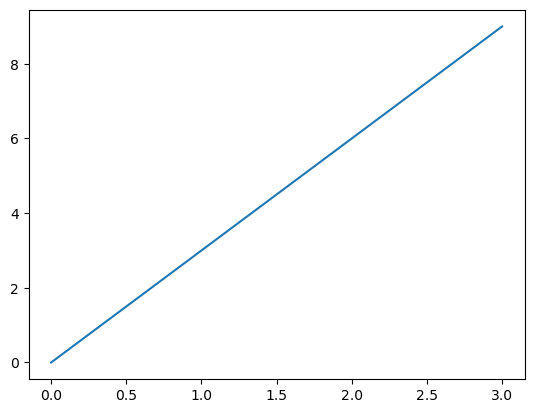

In [43]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)  # line plot
plt.show()  # <-- shows the plot (not needed with pylab)

Или използвайки *pylab*:


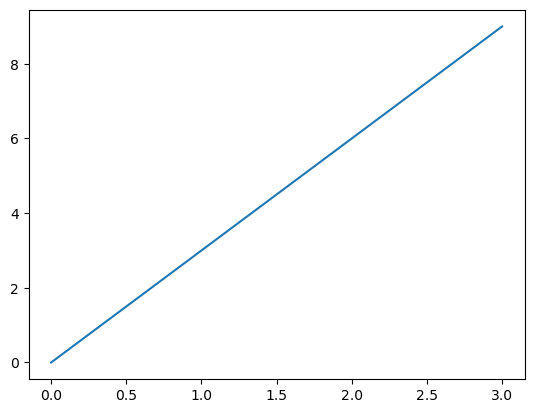

In [44]:
plot(x, y)  # line plot

Използването на `import matplotlib.pyplot като plt` се препоръчва за скриптове, а `pylab` се препоръчва за тетрадки с IPython.

- Показване на едномерни масиви:

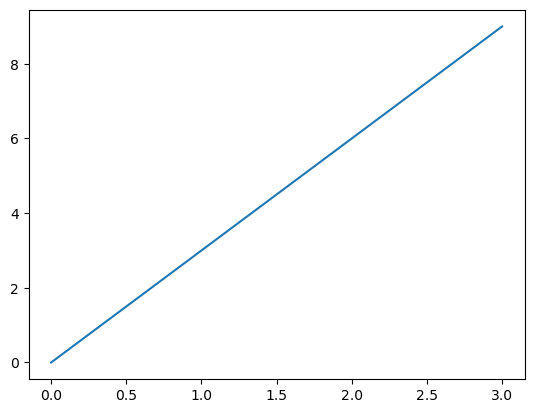

In [45]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)  # line plot

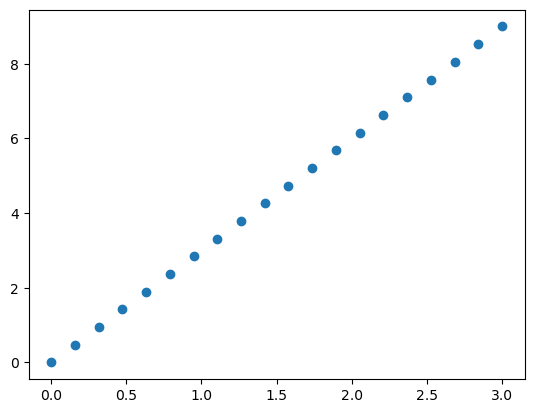

In [46]:
plt.plot(x, y, "o")  # dot plot

- Показване на двуизмерни масиви (например изображения):

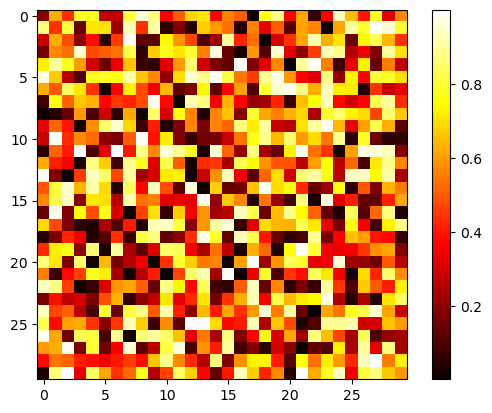

In [47]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)
plt.colorbar()

## Индексиране и нарязване на масиви

По принцип същото като с вградените последователности на Python (например, както със списъците).

In [48]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
a[0], a[2], a[-1]

(0, 2, 9)

Популярният начин на Python за отразяване на масив също работи:

In [50]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

За многомерни масиви индексите са кортежи от цели числа

In [51]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [52]:
a[1, 1]

1

In [53]:
a[2, 1] = 10  # third line, second column
a

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [54]:
a[1]

array([0, 1, 0])

**Филийки**

In [55]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [56]:
a[2:9:3]  # [start:end:step]

array([2, 5, 8])

Последният индекс не е включен

In [57]:
a[:4]

array([0, 1, 2, 3])

По подразбиране \`начало\` е 0,
\`край\` - индекс на последния елемент, \`стъпка\` - 1:


In [58]:
a[1:3]

array([1, 2])

In [59]:
a[::2]

array([0, 2, 4, 6, 8])

In [60]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

Можете да комбинирате, присвоявате и отделяте:

In [61]:
a = np.arange(10)
a[5:] = 10
a

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

In [62]:
b = np.arange(5)
a[5:] = b[::-1]
a

array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])

## Пример. Матрица на делителя

Покажете матрица, в която (x, y) е зачертано, ако y се дели на x.

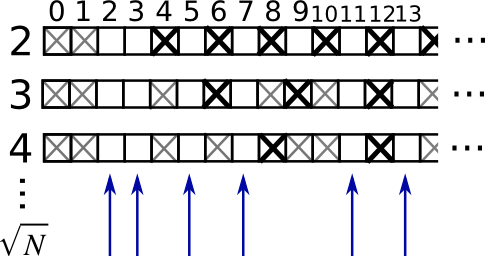

In [66]:
from IPython.display import Image

Image(path_data+"prime-sieve.png")

* Създайте масив `is_prime`, пълен с True стойности

In [67]:
is_prime = np.ones((100,), dtype=bool)

* Нека задраскаме 0 и 1 като непрости:

In [68]:
is_prime[:2] = 0

* За всяко естествено `j`, започващо от 2, “задраскайте” числата, които са му кратни:

In [69]:
N_max = int(np.sqrt(len(is_prime)))
for j in range(2, N_max):
    is_prime[2 * j :: j] = False

is_prime

array([False, False,  True,  True, False,  True, False,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False])

## Индексиране с маски

In [70]:
np.random.seed(3)
a = np.random.random_integers(0, 20, 15)
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])

In [71]:
(a % 3 == 0)

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False, False])

In [72]:
mask = a % 3 == 0
extract_from_a = a[mask]  # or,  a[a%3==0]
extract_from_a  # extract a sub-array with the mask

array([ 3,  0,  9,  6,  0, 12])

Индексирането на маската може да бъде много полезно за присвояване на стойности на подмножество от елементи на масив:


In [73]:
a[a % 3 == 0] = -1
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, 20, -1,  7, 14])

### Индексиране с масив от цели числа

In [74]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [75]:
a[[2, 3, 2, 4, 2]]  # note: [2, 3, 2, 4, 2] is a Python list

array([20, 30, 20, 40, 20])

In [76]:
a[[9, 7]] = -100
a

array([   0,   10,   20,   30,   40,   50,   60, -100,   80, -100])

In [77]:
a = np.arange(10)
idx = np.array([[3, 4], [9, 7]])
idx.shape

(2, 2)

In [78]:
a[idx]

array([[3, 4],
       [9, 7]])